<a href="https://colab.research.google.com/github/jennif8r/NLP/blob/main/ConceitosBasicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceitos Básicos sobre Processamento de Linguagem Natural (PLN)
No pipeline faz parte do pré-processamento.
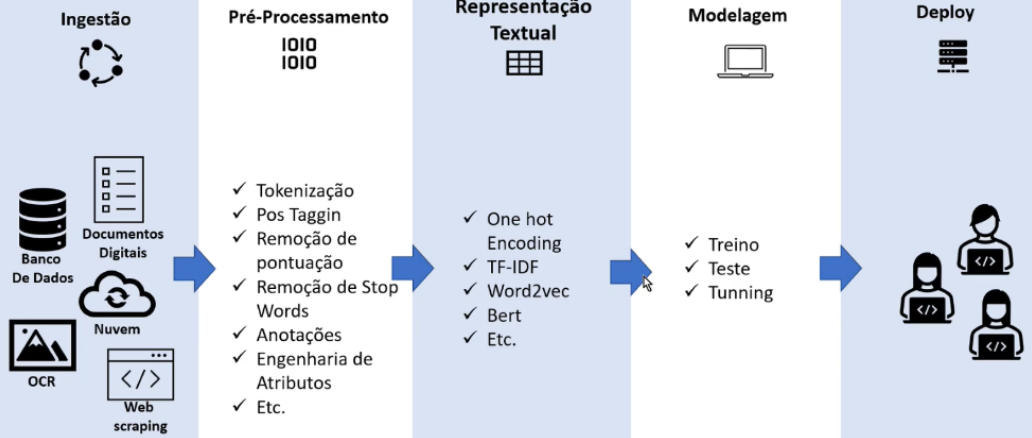

###Corpus
Conjunto de documentos (texto não estruturado) em linguagem natural.

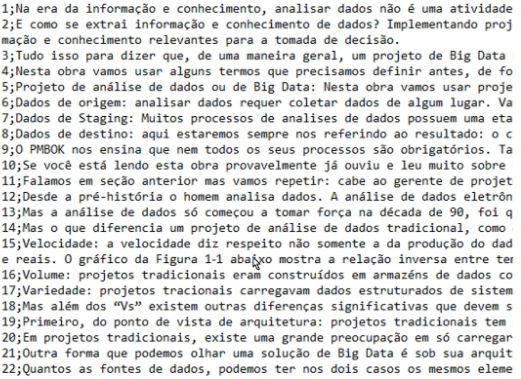

### Preparação do Ambiente e Importação de Bibliotecas


In [ ]:
!pip install spacy

In [ ]:
#modelo de linguagem em portugues
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 14.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from tabulate import tabulate

import spacy

nlp = spacy.load("pt_core_news_sm")

###Inserindo documento

In [ ]:
texto = "Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína"
print(texto)

Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína


##limpeza e preparação do documento



#### **Remoção de Pontuação:**
 A pontuação pode ser removida para evitar ruído na análise do texto. Isso inclui símbolos como ".", ",", "!", "?".

In [ ]:
# Processar o texto
doc = nlp(texto)

#remover pontuação
def remover_pontuacao(text):
    pontuacoes = [token for token in text if token.is_punct]
    doc_sem_pontuacao = [token for token in text if not token.is_punct]
    return doc_sem_pontuacao, pontuacoes


doc_sem_pontuacao, pontuacoes = remover_pontuacao(doc)
print("Texto:",doc)
print("\nTexto após remoção de pontuação:")
print(" ".join([token.text for token in doc_sem_pontuacao]))
print("\nQuantidade de pontuações detectadas:", len(pontuacoes))
print("Pontuações detectadas:", [token.text for token in pontuacoes])

Texto: Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

Texto após remoção de pontuação:
Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender conversar e responder tudo como se fosse um humano mas sem precisar de cafeína

Quantidade de pontuações detectadas: 2
Pontuações detectadas: [',', ',']


#### **Stop Word:**

 Stop words são *palavras comuns* que geralmente *não carregam muito significado* e podem ser *removidas* para *melhorar a eficiência da análise*. Exemplos incluem artigos, preposições e conjunções como "o", "e", "mas".

 Ao gerenciar stop words e pontuação, você torna o texto mais limpo e **focado em termos mais significativos**, melhorando assim a qualidade das análises subsequentes.

 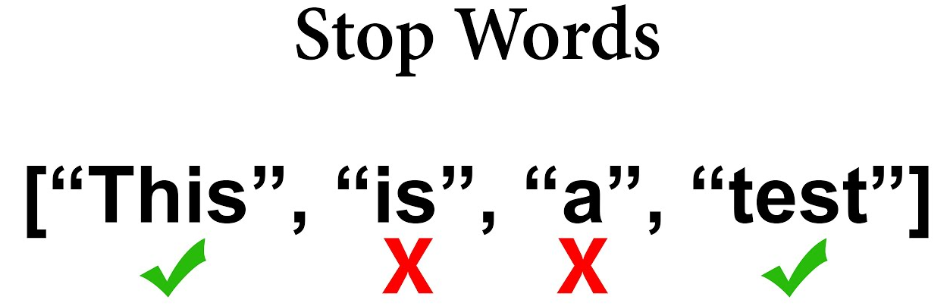

In [ ]:
# Processo de remoção de stop words
def remover_stop_words(Texts):
    contagem = [token for token in Texts if token.is_stop]
    doc_sem_stop_words = [token for token in Texts if not token.is_stop]
    return doc_sem_stop_words, contagem

doc_sem_stop_words, contagem = remover_stop_words(doc_sem_pontuacao)
print('Texto: ', doc)
print('\nTexto sem stop word:')
print(" ".join([token.text for token in doc_sem_stop_words]))
print("\nQuantidade de stop word detectadas:", len(contagem))
print("Stop words detectados:", [token.text for token in contagem])





Texto:  Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

Texto sem stop word:
Processamento linguagem natural superpoderes computador entender conversar responder fosse humano precisar cafeína

Quantidade de stop word detectadas: 16
Stop words detectados: ['de', 'é', 'tipo', 'dar', 'ao', 'seu', 'para', 'ele', 'e', 'tudo', 'como', 'se', 'um', 'mas', 'sem', 'de']


## Tokenization

Tokenização é o processo de dividir um texto em unidades menores chamadas tokens.


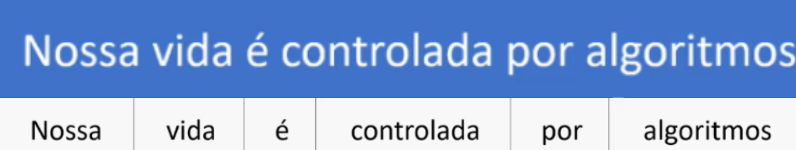

In [ ]:
tokens = [token.text for token in doc_sem_stop_words]
print('Texto original:\n',doc)
print("\nTokenization:")
print(tokens)
print('\nQuantidade de tokens: ',len(tokens))

Texto original:
 Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

Tokenization:
['Processamento', 'linguagem', 'natural', 'superpoderes', 'computador', 'entender', 'conversar', 'responder', 'fosse', 'humano', 'precisar', 'cafeína']

Quantidade de tokens:  12


##**Stemming**
Cortas palavras, buscando ter uma representação raiz e única.


* Definição: O stemming é um processo que reduz as palavras aos seus radicais ou troncos, removendo afixos (sufixos e prefixos). O resultado pode não ser uma palavra válida no idioma.

* História: Introduzido na década de 1960, o stemming foi uma das primeiras técnicas utilizadas em NLP para reduzir palavras à sua forma base com o objetivo de melhorar a recuperação de informações e a análise de texto.

**Exemplo:**


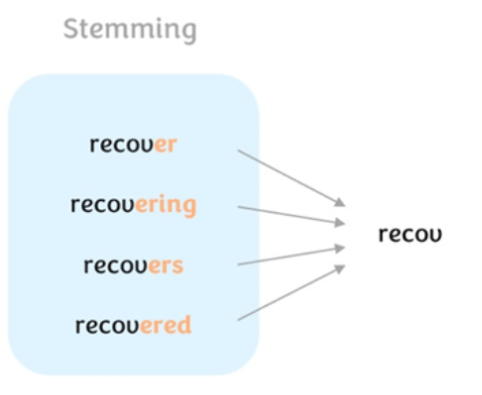

In [ ]:
# O spaCy não possui um algoritmo de stemming embutido, pois é mais focado na lematização,
# que fornece uma forma base mais precisa das palavras.
# No entanto, podemos usar a biblioteca NLTK para fazer stemming, junto com o spaCy para tokenização e lematização.

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("portuguese")

In [ ]:
# Stemming usando NLTK
stems = [stemmer.stem(token.text) for token in doc_sem_stop_words]

print('Texto Original\n',doc)
print("\ntokens:")
print(tokens)
print("\nStemming dos tokens:")
print(stems)

Texto Original
 Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

tokens:
['Processamento', 'linguagem', 'natural', 'superpoderes', 'computador', 'entender', 'conversar', 'responder', 'fosse', 'humano', 'precisar', 'cafeína']

Stemming dos tokens:
['process', 'linguag', 'natural', 'superpod', 'comput', 'entend', 'convers', 'respond', 'foss', 'human', 'precis', 'cafeín']


##Lemmatization
Reduz uma palavra à sua forma base ou canônica (lema), de modo que diferentes formas de uma palavra possam ser analisadas juntas.​

* Definição: A lematização é um processo mais avançado que mapeia palavras para o seu lema ou forma base canônica, considerando o contexto e a análise morfológica. O resultado é sempre uma palavra válida no idioma.

* História: Desenvolvida posteriormente, a lematização tornou-se popular com o avanço dos recursos computacionais e das técnicas de análise linguística mais complexas. Tornou-se amplamente utilizada a partir da década de 1990.

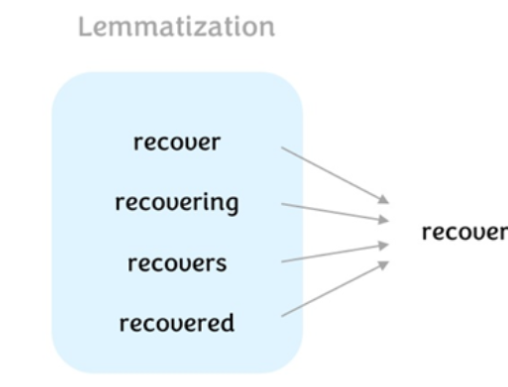

In [ ]:
lemmas = [token.lemma_ for token in doc_sem_stop_words]
print('Texto original:\n',doc)
print('\nTokens:\n',tokens)
print('\nLemmatization:\n',lemmas)


Texto original:
 Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

Tokens:
 ['Processamento', 'linguagem', 'natural', 'superpoderes', 'computador', 'entender', 'conversar', 'responder', 'fosse', 'humano', 'precisar', 'cafeína']

Lemmatization:
 ['Processamento', 'linguagem', 'natural', 'superpoder', 'computador', 'entender', 'conversar', 'responder', 'ser', 'humano', 'precisar', 'cafeína']


##Lemma VS Streamming

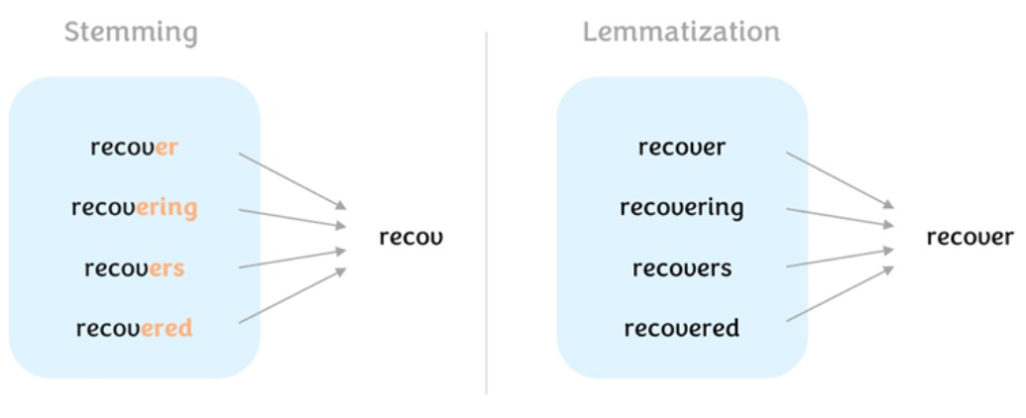

Texto original:
 Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína


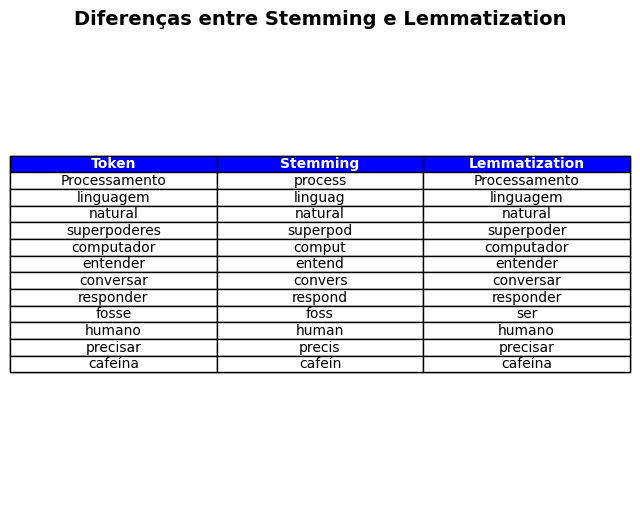

In [ ]:
df = pd.DataFrame({
    'Token': tokens,
    'Stemming': stems,
    'Lemmatization': lemmas
})

print("Texto original:\n", doc)

# Criar a tabela no gráfico usando matplotlib
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho da figura conforme necessário
ax.axis('tight')
ax.axis('off')
table_data = df.values
column_labels = df.columns

ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('blue')
    else:
        cell.set_fontsize(10)
ax.set_title('Diferenças entre Stemming e Lemmatization', fontsize=14, weight='bold')
plt.show()


##Part-of-Speech Tagging (POS Tagging):

POS-Tagging, ou marcação de partes do discurso, é a técnica de atribuir etiquetas gramaticais a palavras em um texto, indicando se são substantivos, verbos, adjetivos, etc. Isso ajuda a entender a função de cada palavra dentro da frase.

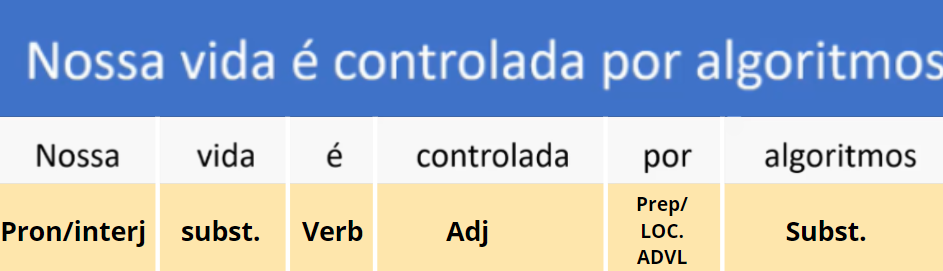

Texto original:
 Processamento de linguagem natural é tipo dar superpoderes ao seu computador para ele entender, conversar e responder tudo como se fosse um humano, mas sem precisar de cafeína

Tokens ['Processamento', 'linguagem', 'natural', 'superpoderes', 'computador', 'entender', 'conversar', 'responder', 'fosse', 'humano', 'precisar', 'cafeína']
Pos Tagging ['PROPN', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', 'VERB', 'VERB', 'AUX', 'NOUN', 'VERB', 'NOUN']




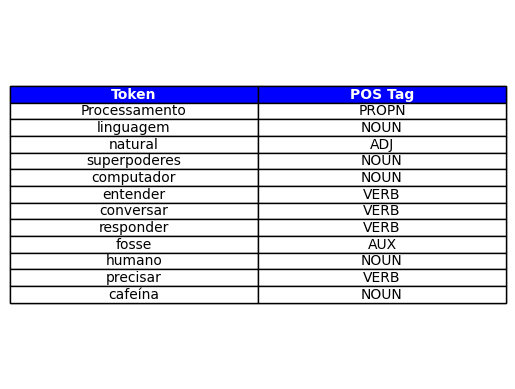

In [ ]:
pos_tags = [token.pos_ for token in doc_sem_stop_words]

dfe = pd.DataFrame({
    'Token': tokens,
    'POS Tag': pos_tags
})

print("Texto original:\n", doc)
print('\nTokens', tokens)
print('Pos Tagging', pos_tags)
print('\n')

# Criar a tabela no gráfico usando matplotlib
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = dfe.values
column_labels = dfe.columns

ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('blue')
    else:
        cell.set_fontsize(10)
plt.show()



# Exemplo de representação de texto

* vamos ver a representação  basica de vetor.
##One-hot:

tokens: ['Processamento', 'linguagem', 'natural', 'superpoderes', 'computador', 'entender', 'conversar', 'responder', 'fosse', 'humano', 'precisar', 'cafeína']
Tamanho do Vocabulário: 12

One-Hot Encodings:

Processamento: [1 0 0 0 0 0 0 0 0 0 0 0]
linguagem: [0 1 0 0 0 0 0 0 0 0 0 0]
natural: [0 0 1 0 0 0 0 0 0 0 0 0]
superpoderes: [0 0 0 1 0 0 0 0 0 0 0 0]
computador: [0 0 0 0 1 0 0 0 0 0 0 0]
entender: [0 0 0 0 0 1 0 0 0 0 0 0]
conversar: [0 0 0 0 0 0 1 0 0 0 0 0]
responder: [0 0 0 0 0 0 0 1 0 0 0 0]
fosse: [0 0 0 0 0 0 0 0 1 0 0 0]
humano: [0 0 0 0 0 0 0 0 0 1 0 0]
precisar: [0 0 0 0 0 0 0 0 0 0 1 0]
cafeína: [0 0 0 0 0 0 0 0 0 0 0 1]


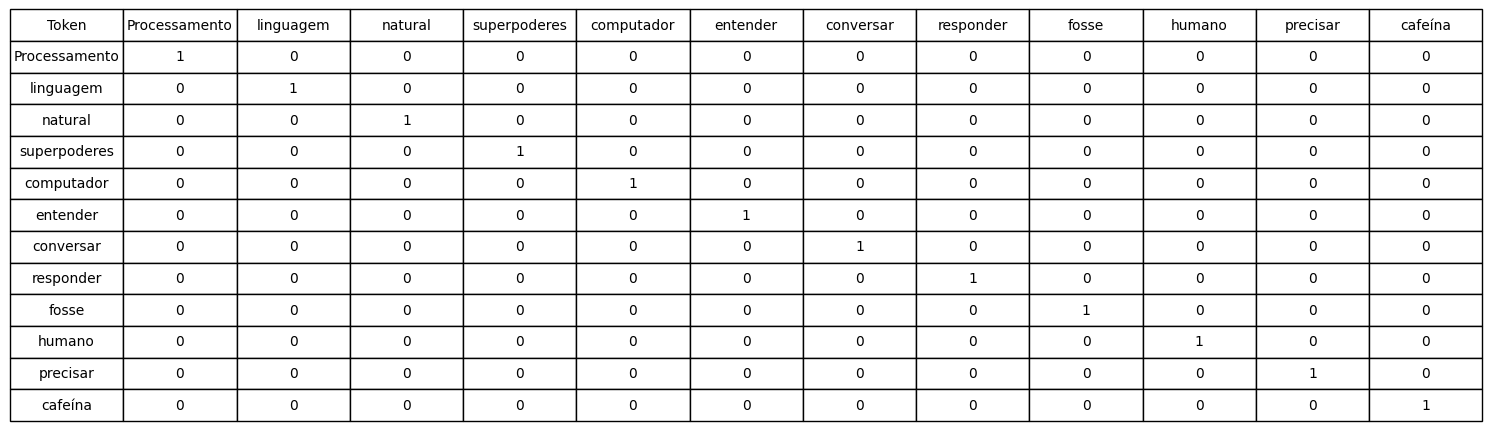

In [ ]:
import matplotlib.pyplot as plt
tokens_size = len(tokens)
print("tokens:", tokens)
print("Tamanho do Vocabulário:", tokens_size)

# Mapear palavras para índices
word_to_index = {word: idx for idx, word in enumerate(tokens)}

# Vetorização one-hot
one_hot_vectors = np.zeros((len(tokens), tokens_size), dtype=int)

for i, token in enumerate(tokens):
    index = word_to_index[token]
    one_hot_vectors[i, index] = 1

print("\nOne-Hot Encodings:\n")
for token, vector in zip(tokens, one_hot_vectors):
    print(f"{token}: {vector}")

#colocar na tabela:

df = pd.DataFrame(one_hot_vectors, columns=word_to_index.keys())
df.insert(0, 'Token', tokens)

fig, ax = plt.subplots(figsize=(10, 4))


ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.9, 1.9)

plt.show()

